---
# Day 4

Import relevant raw data and parse "json-string" column "industries"

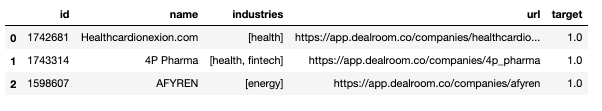


+ Importing **Dealroom news** from individual API queries (2' for 1513 companies) 
+ Scraping **Meta tag descriptions** (17' total)

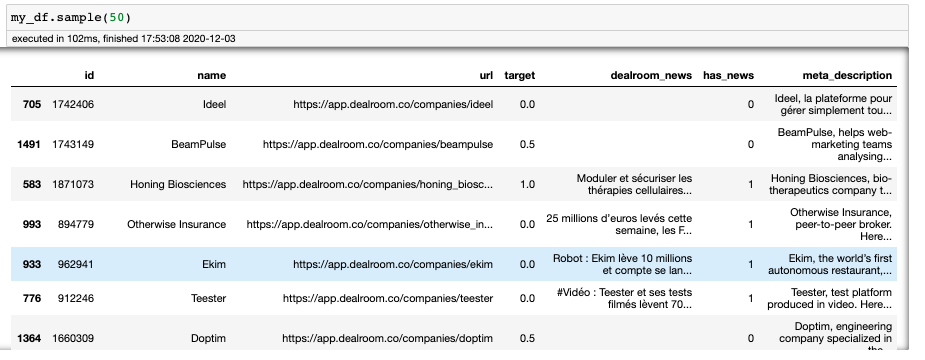

While all sites have meta descriptions, only 45% of companies have news in Dealroom

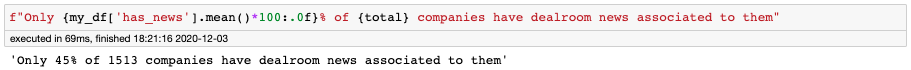

In both cases, descriptions are mostly in English, but encompass other languages:

+ French, German, Japanese for **Dealroom news**, with no language marker
+ Occasional French for **Meta description** (but there will be more language when we go out of the train environment)

`=> TODO: seek a language marker in Meta tags, or use a Google detect and translate API (free until 500k characters)`

Then preprocessing the text into lists of cleaned, lemmatized tokens

`=> TODO: if using a word2vec transfer learning corpus, maybe not use lemmatization?`

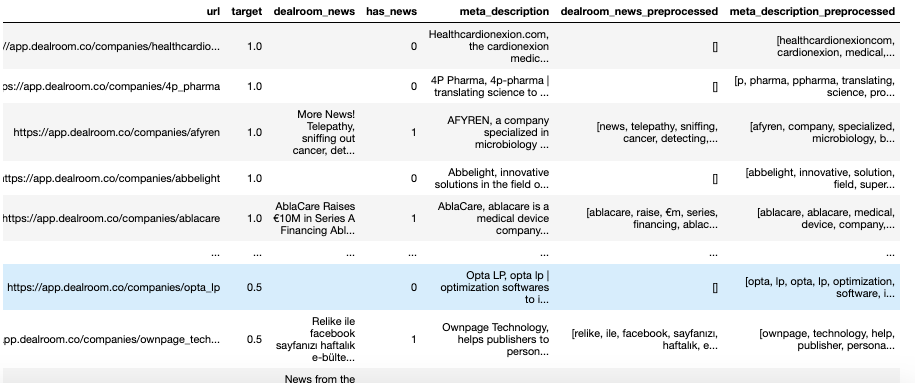

Fitting a Word2Vec embedding on meta_description_processed, then using it to vectorize the list of words as an array of vectors.
Flattening the arrays in lists and cropping at the shortest list (≈200 coordinates).
Using Embedding Projector to reduce dimensionnality in a meaningful way:

+ **Without supervision, no clusters** emerge
+ But **with supervision on target, clear clusters emerge** (but not fully separate)


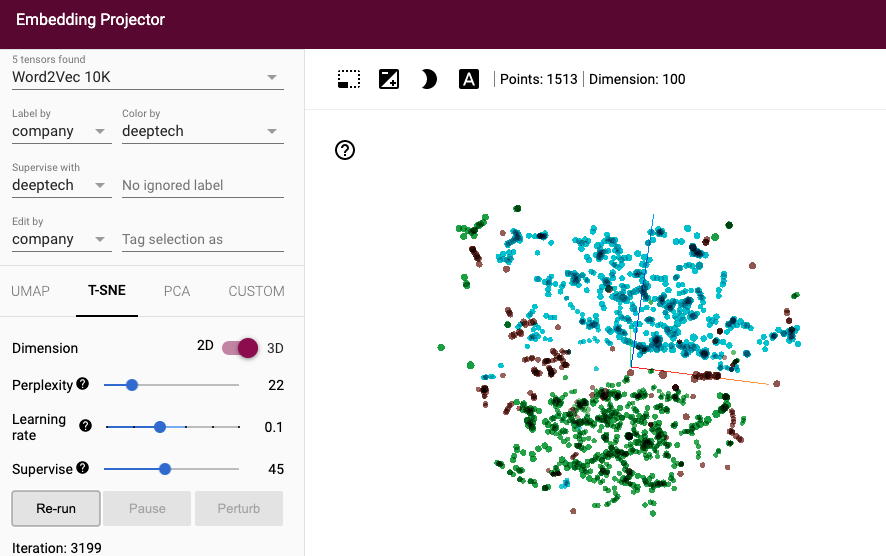

---
# Day 5

*The truth about day 5 is that I started by addin the industries, that weren't there yesterday, in order to better understand the clusters*

*BUT in the process I overwrote the dealroom news and metatags columns 😱*

*So the morning of day 5 I import the meta descriptions again, but not the dealroom news that were partial anyway*

`🤭 next time I won't forget pandas.DataFrame.to_csv…`

I realize that I had scraped the dealroom pages ('url' field) instead of the company websites ('website_url"), so I change my function, but 652 companies out of the 1513 throw an exception. In that case, I replace the meta description by the dealroom one.

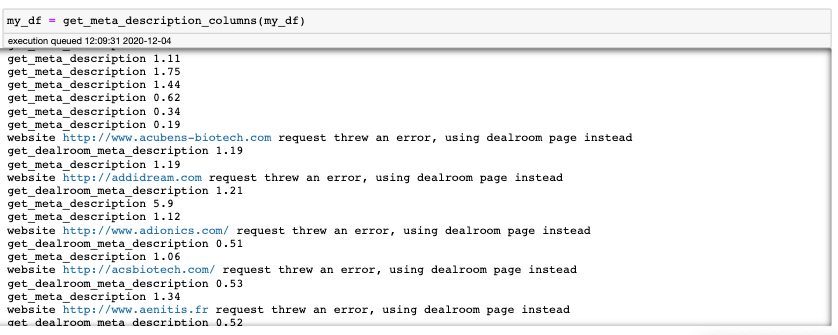

They throw an error because:
    
+ the company does not have a meta-description tag, ex.: https://www.addidream.com/en/home/
+ the website url is incorrect (error 404), ex.: http://www.acubens-biotech.com/
+ the website url is nan

We concatenate both the meta description and the Dealroom meta description (so some will have the dealroom twice)
We embed them using an existing wikipedia corpus 

RNN LSTM trained on a train test gives a mae or .35, which is better than .43 for "dummy" mean, but still low
rmse is even closer to dummy one

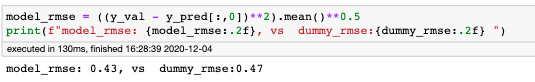

And for categorical approach (drop 'almost'):

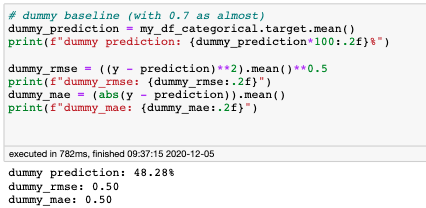

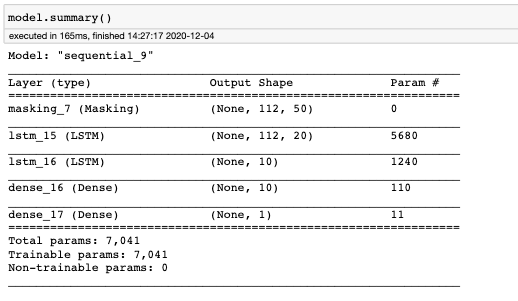

Ce modèle overfitte dès la 1re ou 2e époque

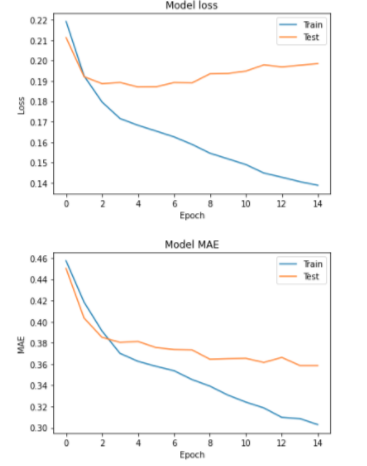

#### Now trying to prevent the model from overfitting

+ A dropout layer at the end and an additional Dense relu layer after it: no impact
+ Enlever la première couche LSTM pour simplifier: no impact
+ Use stemmer instead of lemmatizer: pas meilleurs chiffres mais ne semble pas avoir fini de converger (2e ci-dessous) -> relance avec patience = 30, batch_size=16. ok, worse. back to former parameters.
+ 70 instead of 30 units in LSTM layer 2: rmse de 0.42 au lieu de 0.43 mais overfitte encore plus (3e)


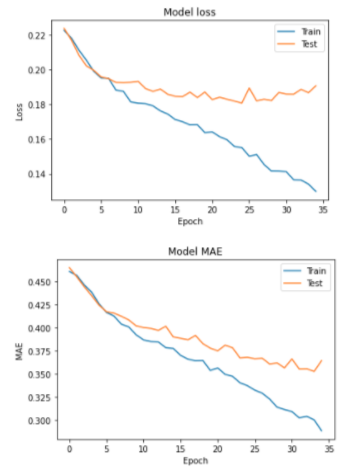, 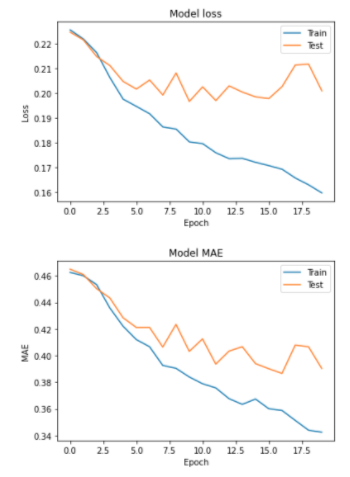, 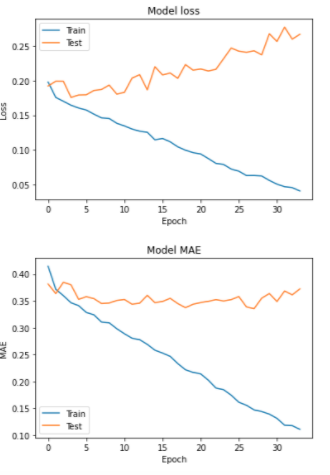

+ back to smaller layers + trying a regularization on Dense relu

model.add(layers.Dense(10, activation='relu',  activity_regularizer=reg_l1_l2))

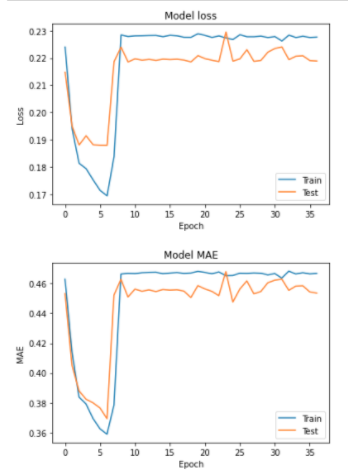

model.add(layers.Dense(10, activation='relu',  bias_regularizer=reg_l1_l2))
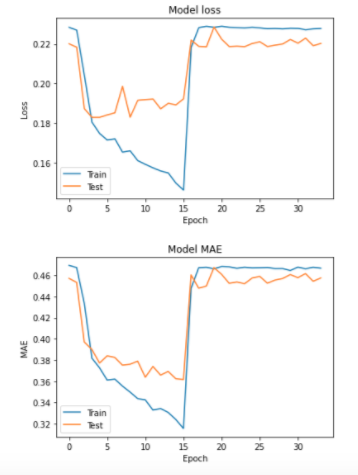

Avec 3 categories et un softmax

----
Different possible existing embeddings:

+ "glove-wiki-gigaword-50" 

```
word2vec_wiki.wv.similar_by_vector(word2vec_wiki.wv["tech"])
[('tech', 1.0),
 ('technology', 0.7613498568534851),
 ('computer', 0.7384644150733948),
 ('electronics', 0.696427047252655),
 ('chip', 0.6770018339157104),
 ('advanced', 0.6500986814498901),
 ('helped', 0.6468499302864075),
 ('texas', 0.6434584856033325),
 ('giants', 0.6376305222511292),
 ('new', 0.6368595361709595)]
 
word2vec_wiki.wv.similar_by_vector(word2vec_wiki.wv["biotech"])
[('biotech', 0.9999998807907104),
 ('biotechnology', 0.8968190550804138),
 ('pharmaceutical', 0.7750740647315979),
 ('monsanto', 0.7580938935279846),
 ('pharmaceuticals', 0.7183324694633484),
 ('amgen', 0.7021055221557617),
 ('agribusiness', 0.6887552738189697),
 ('tobacco', 0.684147298336029),
 ('coca', 0.6837125420570374),
 ('growers', 0.6813806891441345)]
 
word2vec_wiki.wv.similar_by_vector(word2vec_wiki.wv["nanotech"])
[('nanotech', 1.0),
 ('neuromarketing', 0.6937649250030518),
 ('nanomaterials', 0.6913321614265442),
 ('tajura', 0.6881071329116821),
 ('biomaterials', 0.6880257725715637),
 ('nanotechnology', 0.667823076248169),
 ('opencourseware', 0.666871190071106),
 ('cryogenics', 0.6645549535751343),
 ('brooktrout', 0.6638575792312622),
 ('sematech', 0.6508078575134277)]
 
a healthtech mais voisins non pertinents
```

 
+ "glove-twitter-200" 

```
word2vec_wiki.wv.similar_by_vector(word2vec_wiki.wv["tech"])

[('tech', 1.0),
 ('technology', 0.7984446883201599),
 ('startup', 0.6608036160469055),
 ('innovation', 0.6581680774688721),
 ('mobile', 0.6376364231109619),
 ('business', 0.6348487138748169),
 ('startups', 0.6202924847602844),
 ('industry', 0.6104779839515686),
 ('software', 0.6068009734153748),
 ('hardware', 0.5987409949302673)]

word2vec_wiki.wv.similar_by_vector(word2vec_wiki.wv["biotech"])
[('biotech', 1.0),
 ('pharma', 0.7436743974685669),
 ('pharmaceutical', 0.6674783229827881),
 ('biotechnology', 0.6603209972381592),
 ('r&d', 0.5450037717819214),
 ('agribusiness', 0.5266454815864563),
 ('gmo', 0.5218278765678406),
 ('companies', 0.5205241441726685),
 ('mining', 0.5202422142028809),
 ('biomedical', 0.5143028497695923)]

word2vec_wiki.wv.similar_by_vector(word2vec_wiki.wv["nanotech"])
[('nanotech', 0.9999999403953552),
 ('nanotechnology', 0.5042550563812256),
 ('wral', 0.412231981754303),
 ('geospatial', 0.4091745913028717),
 ('v-log', 0.40346983075141907),
 ('stemcells', 0.39966756105422974),
 ('futurism', 0.3994828462600708),
 ('polymer', 0.39364707469940186),
 ('avionics', 0.38799867033958435),
 ('photonics', 0.38585394620895386)]

n'a pas healthtech

 ```
+ see also patent-2017 in https://github.com/RaRe-Technologies/gensim-data or here https://www.kite.com/python/docs/gensim.downloader


`df[df.isnull().any(axis=1)]`
NB: il y a beaucoup de taglines nullles, mais une seule dealroom meta nulle -> sticking to approach of scraping dealroom meta
    